loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized
loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


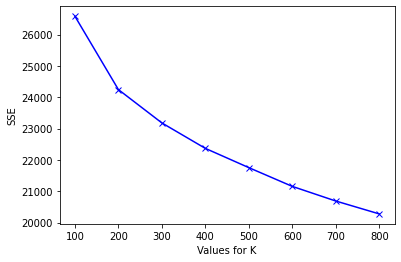

In [2]:
import  numpy as np
from sklearn.cluster import KMeans
from preclustering import PreClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
sse={}
X,df = PreClustering.main()

for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=800).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [8]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectoriser.fit_transform(df)
kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([df,pd.DataFrame(X.toarray(),columns=vectoriser.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/home/annabelle/Documents/Advanced_Machine_Learning_Project/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
result[['text', 'cluster']]

,text,cluster
0,usr i do not play wow any more haha. just drink,182
1,"usr o hera.. hera, wherefor art though, hera? ...",27
2,just gtting startd on this wha do ya do,143
3,"the bass, the rock, the mic, the trebl",47
4,usr have a good time. wish i could be out @ ja...,11
...,...,...
49995,just ad &quot;next video convert 2.6.0&quot; t...,156
49996,dead tire after being touristy. can not compla...,45
49997,usr i wish you were play at my prom,198
49998,usr omgpop is the best!,194


In [10]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='text' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [11]:
result_labelled[['text', 'cluster', 'label']]

,text,cluster,label
0,usr i do not play wow any more haha. just drink,182,do not
1,"usr o hera.. hera, wherefor art though, hera? ...",27,usr
2,just gtting startd on this wha do ya do,143,do
3,"the bass, the rock, the mic, the trebl",47,the
4,usr have a good time. wish i could be out @ ja...,11,time
...,...,...,...
49995,just ad &quot;next video convert 2.6.0&quot; t...,156,quot
49996,dead tire after being touristy. can not compla...,45,can
49997,usr i wish you were play at my prom,198,at
49998,usr omgpop is the best!,194,is the


In [12]:
pd.pivot_table(result_labelled, index=['label'], values=['text'], aggfunc='count').sort_values(['text'], ascending=False).rename(columns={'text':'count of text'})

,count of text
label,
,1313
usr,1157
go to,1083
do not,1034
quot,984
...,...
love watch,61
more this,61
go make to,59


In [13]:
sil_score = silhouette_score(X, kmeans.labels_)
sil_score

0.0478720003690822

In [17]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X.toarray(), kmeans.labels_)

3.0658821749531957